In [ ]:
import numpy as np
from sklearn import svm
import pickle
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
svm_c = 1
svm_gamma = 0.01
svm_kernal = 'rbf'
clsFile = 'cls.sav'

In [ ]:
file_names = ['dense_out_train.csv','dense_out2_train.csv','dense_out3_train.csv','dense_out4_train.csv']
test_files = ['dense_out_val.csv','dense_out2_val.csv','dense_out3_val.csv','dense_out4_val.csv']

In [ ]:
# !cp -R '/content/drive/My Drive/COVID-19/Sample' '/content/'
# !rm -R 'Sample'

In [ ]:
# read dense net
loadData = np.loadtxt(file_names[0],delimiter=',')
trainY = loadData[:,-1]
train1Data = loadData[:,:-1]
print(train1Data.shape,trainY.shape)

(6, 3) (6,)


In [ ]:
# read dense net2
train2Data = np.loadtxt(file_names[1],delimiter=',')[:,:-1]
print(train2Data.shape)

(6, 3)


In [ ]:
# read dense net3
train3Data = np.loadtxt(file_names[2],delimiter=',')[:,:-1]
print(train3Data.shape)

(6, 3)


In [ ]:
# read dense net4
train4Data = np.loadtxt(file_names[3],delimiter=',')[:,:-1]
print(train4Data.shape)

(6, 3)


In [ ]:
#concatenate all files
train_one = np.concatenate((train1Data, train2Data), axis=1)
train_two = np.concatenate((train3Data, train4Data), axis=1)
trainX = np.concatenate((train_one, train_two), axis=1)
print(trainX.shape)

(6, 12)


In [ ]:
model = svm.SVC(C=svm_c,kernel=svm_kernal,gamma=svm_gamma)

In [ ]:
model.fit(trainX,trainY)
pickle.dump(model, open(clsFile, 'wb'))

# **Testing**

In [ ]:
# read dense net
loadData = np.loadtxt(test_files[0],delimiter=',')
testY = loadData[:,-1]
test1Data = loadData[:,:-1]
print(test1Data.shape,testY.shape)

(6, 3) (6,)


In [ ]:
# read dense net2
test2Data = np.loadtxt(test_files[1],delimiter=',')[:,:-1]
print(test2Data.shape)

(6, 3)


In [ ]:
# read dense net3
test3Data = np.loadtxt(test_files[2],delimiter=',')[:,:-1]
print(test3Data.shape)

(6, 3)


In [ ]:
# read dense net4
test4Data = np.loadtxt(test_files[3],delimiter=',')[:,:-1]
print(test4Data.shape)

(6, 3)


In [ ]:
#concatenate all files
test_one = np.concatenate((test1Data, test2Data), axis=1)
test_two = np.concatenate((test3Data, test4Data), axis=1)
testX = np.concatenate((test_one, test_two), axis=1)
print(testX.shape)

(6, 12)


In [ ]:
model = pickle.load(open(clsFile, 'rb'))

In [ ]:
acc = model.score(testX,testY)

In [ ]:
print(acc)

0.3333333333333333


In [ ]:
y_pred = model.predict(testX)
#print(y_pred)

[1. 2. 2. 1. 2. 1.]


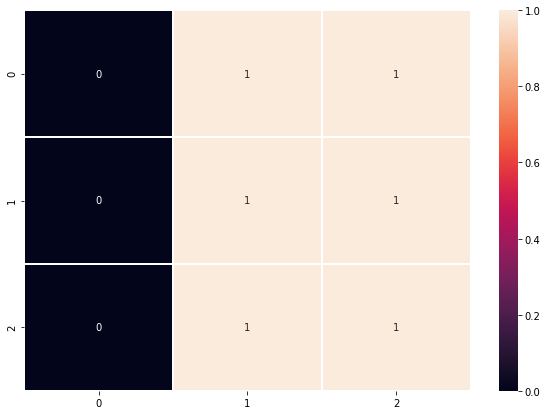

In [ ]:
cm = confusion_matrix(testY, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,linewidths=.5)